<a href="https://colab.research.google.com/github/bmnds/uea-data-science-02-python-programming/blob/master/trabalho_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Final da Disciplina de Programação para Ciência de Dados do Curso de Pós-Graduação em Ciência de Dados da UEA-AM
Dupla: Alberto e Bruno

## Objetivo
Auxiliar no monitoramento da saúde pública brasileira, a partir da análise de questionamentos lançados por brasileiros na plataforma Twitter. Minimamente, o trabalho fornecerá uma visão geral sobre o _dataset_ de _tweets_ coletados durante o período da pandemia, bem como os principais temas discutidos, sob a ótica temporal e espacial.

## Estrutura de tópicos do Trabalho
O trabalho foi organizado seguindo a ordem de especificação do trabalho fornecida pelo professor da disciplina.

### 1. Visão Geral
* [X] Importar todos os **tweets** e descrevê-los
* [X] Extrair somente as **dúvidas** relacionadas ao COVID-19

#### 2. Temas Discutidos
Analisar as dúvidas, sobre:
* [X] **Doença**
* [X] **Medicamentos**
* [X] **Organizações**
* [X] **Pessoas**

#### 3. Visão Temporal
* [X] Definir o intervalo de tempo em dias, semanas ou meses
* [X] Apresentar pelo menos duas análises temporais

#### 4. Visão Geográfica
* [X] Definir como classificar geograficamente os dados fornecidos
* [X] Apresentar pelo menos duas análises geográficas

## Tecnologias e Bibliotecas empregadas
* [x] Google Colaboratory
* [x] GitHub
* [x] Jupyter Notebook
* [X] Pandas
* [X] GeoPandas
* [X] NumPy
* [X] MatPlotLib


#1. Visão Geral

### Inicialização do Jupyter Notebook

Bibliotecas utilizadas:
* Pandas para manipulação do _dataset_
* MatplotLib para exibição de gráficos de barra, pizza, etc.
* GeoPandas para exibição de dados espaciais

In [79]:
import pandas as pd
import matplotlib 
!pip install geopandas
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import re # lib para trabalhar com expressões regulares



Download do _dataset_ em formato CSV e carregamento dos dados com Pandas

In [80]:
!wget http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz
!tar -xvf dados-curso-completo.csv.tar.gz
tw=pd.read_csv("dados-curso-completo.csv")

--2020-10-24 02:47:15--  http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz
Resolving tiagodemelo.info (tiagodemelo.info)... 108.167.188.189
Connecting to tiagodemelo.info (tiagodemelo.info)|108.167.188.189|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143340808 (137M) [application/x-gzip]
Saving to: ‘dados-curso-completo.csv.tar.gz.3’

dados-curso-complet 100%[===================>] 136.70M  61.5MB/s    in 2.2s    

2020-10-24 02:47:18 (61.5 MB/s) - ‘dados-curso-completo.csv.tar.gz.3’ saved [143340808/143340808]

dados-curso-completo.csv


### Exploração dos dados

O dataset importado contém **13 colunas**, sendo 5 referentes à localização geográfica: lugar; país; sigla; latitude; e longitude. Para a finalidade deste trabalho, as colunas **usuario** e **apelido** não são importantes e, portanto, serão excluídas na etapa de pré-processamento.

In [81]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658825 entries, 0 to 1658824
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   data        1658825 non-null  object 
 1   usuario     1658768 non-null  object 
 2   apelido     1658825 non-null  object 
 3   texto       1658825 non-null  object 
 4   retweet     1658825 non-null  int64  
 5   seguidores  1658825 non-null  int64  
 6   idioma      1658825 non-null  object 
 7   lugar       74605 non-null    object 
 8   pais        74600 non-null    object 
 9   sigla       74595 non-null    object 
 10  latitude    8720 non-null     float64
 11  longitude   8720 non-null     float64
 12  hashtags    1658825 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 164.5+ MB


Há um total de **1.658.825** tweets no dataset fornecido, dos quais apenas **8.720** possuem latitude e longitude preenchidas, destes, aproximadamente **50%** foi postado a partir da região Sudeste do Brasil.

In [82]:
tw.describe()

,retweet,seguidores,latitude,longitude
count,1.658825e+06,1.658825e+06,8720.000000,8720.000000
mean,1.978533e+02,3.257206e+04,-40.237583,-11.117100
std,6.337641e+03,3.680300e+05,20.808494,19.169105
min,0.000000e+00,0.000000e+00,-123.120400,-37.818769
25%,0.000000e+00,1.010000e+02,-47.864334,-23.305300
50%,0.000000e+00,3.800000e+02,-43.955615,-19.624400
75%,0.000000e+00,1.470000e+03,-38.453198,-7.120700
max,1.139763e+06,8.424125e+07,174.789310,58.257776


In [83]:
tw.iloc[1000000:]

,data,usuario,apelido,texto,retweet,seguidores,idioma,lugar,pais,sigla,latitude,longitude,hashtags
1000000,2020-03-27 22:28:06,Jackson Kestring,JacksonKestring,@travfer1 @cafecomferri A malária é transmitid...,0,20,pt,NaN,NaN,NaN,NaN,NaN,[]
1000001,2020-06-17 18:53:49,𝕻𝖗𝖎𝖘𝖈𝖎𝖑𝖑𝖆,Priszzb,"@TrottaPedro Sim, mas to falando que muitos da...",0,147,pt,NaN,NaN,NaN,NaN,NaN,[]
1000002,2020-06-29 21:10:06,Vinicius Cordeiro,vinacordeiros,rolando boatos FORTES que o lockdown será decr...,1,497,pt,NaN,NaN,NaN,NaN,NaN,[]
1000003,2020-04-02 20:54:41,Lúcia de Azevedo. \🇧🇷🇵🇹🇮🇱🇺🇸/,luciaazevedo,"@jairbolsonaro Roubaram os valores morais, fam...",2,1643,pt,NaN,NaN,NaN,NaN,NaN,[]
1000004,2020-04-16 20:00:28,Mateus🇧🇷,mxcteus,Se hoje em dia com toda a informação que temos...,3,2465,pt,NaN,NaN,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1658820,2020-03-13 17:26:18,broca,whoisdrill,oms: tamo tendo pandemia evitar\n conglomerado...,0,361,pt,NaN,NaN,NaN,NaN,NaN,[]
1658821,2020-05-12 13:02:34,Renato 🇧🇷,VerdadeExpress,"@OsmarTerra Sr. Osmar Terra, gostaria de ouvir...",0,4066,pt,NaN,NaN,NaN,NaN,NaN,[]
1658822,2020-03-19 18:16:30,eugeniocosta8,EugenioCosta8,CIENTISTA DE HARVARD PREVÊ QUE ATÉ 70% DO MUND...,3,5307,pt,NaN,NaN,NaN,NaN,NaN,['CORONAVIRUS']
1658823,2020-04-07 18:14:45,Wagner Mota - Seriedade + Geek,wagnermota75,"#BolsonaroTemRazaoSim porque, quando a prefeit...",0,1000,pt,NaN,NaN,NaN,NaN,NaN,['BolsonaroTemRazaoSim']


Os tweets são referentes ao período de 01/01/2020 a 28/07/2020.

In [84]:
tw_datas = tw.filter(items=['data'])
print(tw_datas.min())
print(tw_datas.max())

data    2020-01-01 00:42:12
dtype: object
data    2020-07-28 17:19:44
dtype: object


O foco deste trabalho é analisar dados do Brasil, e, portanto, tweets em outros idiomas serão descartados na fase de processamento dos dados.

pt    1586796
en      23991
es      14255
Name: idioma, dtype: int64


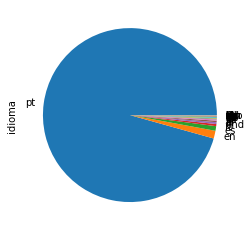

In [85]:
print(tw.idioma.value_counts().nlargest(3))
tw.idioma.value_counts().plot(kind='pie')

In [86]:
tw[tw.idioma.eq('en')].texto

24         RT @DurhamCatholic: If you’re feeling disconne...
36         RT @ddale8: Trump continues that it's fine if ...
40                              @LaurenJauregui YESSS LAUREN
110        RT @chartdata: Current top 10 singles on US iT...
191        RT @emel0371: When quarantine is over 😂\n( cre...
                                 ...                        
1658642    RT @katewalsh: my plans                       ...
1658675    @neilmoysey @piersmorgan @BorisJohnson But Cum...
1658731    Hadley has been prescribed antibiotics as he h...
1658752    RT @rudy_betrayed: me: hey can we have sex in ...
1658811    Franklin Duration Income Trust : Universal Tru...
Name: texto, Length: 23991, dtype: object

Há 74.600 tweets com a informação do País preenchida, destes, **90%** são do Brasil.

Total de tweets com País preenchido: 74600
Porcentagem BR: 90.14343163538874


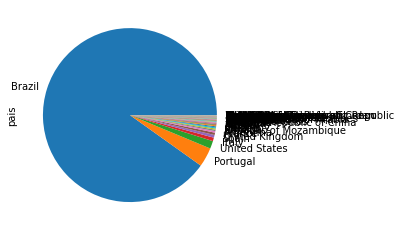

In [87]:
print('Total de tweets com País preenchido: ' + str(tw.pais.count()))
tw_pais_counts = tw.pais.value_counts()
print('Porcentagem BR: ' + str(tw_pais_counts['Brazil']/tw.pais.count()*100))
tw_pais_counts.plot(kind='pie')

### Pré-Processamento

A coluna **data** não está com o tipo _datetime_ e precisa ser ajustada para podermos realizar análises temporais. Após o ajuste foi possível plotar o histograma. Podemos constatar que a maioria dos tweets foi postada no período compreendido entre o final de março e a primeira metade de abril, coincidindo com a época em que o Brasil atingiu a marca dos 100.000 casos de COVID-19.

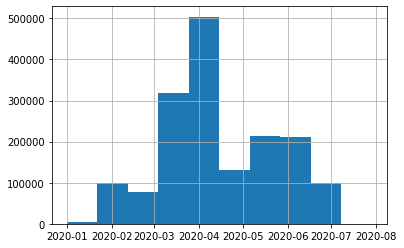

In [88]:
tw.data = pd.to_datetime(tw.data)
tw.data.hist()

Apenas os dados no idioma **pt** interessam para nossa análise, então os demais serão removidos do dataset.

In [89]:
tw = tw[tw.idioma.eq('pt')]

Para viabilizar análises espaciais, precisamos criar uma coluna do tipo _geometry_ no dataset e remover as colunas originais de latitude e longitude. Após adição da coluna, foi possível plotar um mapa com os tweets. Apesar de termos visto anteriormente que a grande maioria dos tweets foram originados na região Sudeste, o mapa abaixo ilustra que a amostragem possui tweets de praticamente todas as regiões do Brasil.

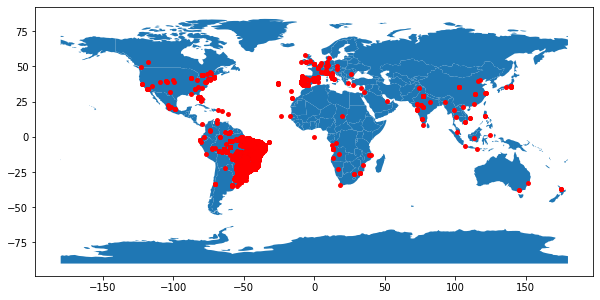

In [90]:
if 'geometry' not in tw.columns:
  geometry = [Point(xy) for xy in zip(tw['latitude'], tw['longitude'])]
  tw = GeoDataFrame(tw, geometry=geometry)
if 'geometry' in tw.columns:
  if 'longitude' in tw.columns:
    del tw['longitude']
  if 'latitude' in tw.columns:
    del tw['latitude']

# plotagem do mapa mundi usando a lib GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
tw.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15)

As colunas **usuario** e **apelido** não são importantes para o objetivo deste trabalho e, portanto, devem ser descartadas.

In [91]:
if 'usuario' in tw.columns:
  del tw['usuario']
if 'apelido' in tw.columns:
  del tw['apelido']
tw.dtypes

data          datetime64[ns]
texto                 object
retweet                int64
seguidores             int64
idioma                object
lugar                 object
pais                  object
sigla                 object
hashtags              object
geometry            geometry
dtype: object

### Extração das Dúvidas

O método utilizado para a extração das dúvidas a partir do texto do _tweet_, foi: quebrar as sentenças contidas no texto, identificadas pelos caracteres `?`, `!`, `.` ou `;`; e em seguida descartar aquelas não terminadas com o caractere de interrogação, `?`.

Todas as dúvidas identificadas compuseram um novo _dataset_ denominado **DuvidasDB**.

**Nota*: um único tweet pode originar 0, 1 ou várias dúvidas e, portanto, nos casos em que haviam múltiplas dúvidas no mesmo texto, foram criados múltiplos novos registros no dataset DuvidasDB.

In [92]:
def break_text_into_sentences(text):
  return re.findall('[^[?|!|.|;]+]*[?|!|.|;]', text)

def filter_only_questions(sentences):
  return list(filter(lambda sentence: sentence.endswith('?'), sentences))

new_tweets = []
for tweet in tw.itertuples(index=False):
    sentences = break_text_into_sentences(tweet.texto)
    questions = filter_only_questions(sentences)
    for question in questions:
      new_tweet = ((tweet.data,) + (question,) + (tweet.retweet,
                                                  tweet.seguidores,
                                                  tweet.idioma,
                                                  tweet.lugar,
                                                  tweet.pais,
                                                  tweet.sigla,
                                                  tweet.hashtags,
                                                  tweet.geometry))
      new_tweets.append(new_tweet) 
DuvidasDB = pd.DataFrame(new_tweets, columns = ['data', 'duvida', 'retweet', 'seguidores', 'idioma', 'lugar', 'pais', 'sigla', 'hashtags', 'geometry'])
del new_tweets
DuvidasDB.head()

,data,duvida,retweet,seguidores,idioma,lugar,pais,sigla,hashtags,geometry
0,2020-03-23 18:51:14,@BolsonaroSP Cade o fundão deputado?,0,138,pt,NaN,NaN,NaN,[],POINT (nan nan)
1,2020-04-01 21:11:07,Fumaça de cigarro pode propagar coronavírus?,0,1885,pt,NaN,NaN,NaN,[],POINT (nan nan)
2,2020-06-25 11:09:19,@ipratesMD @dr_pampers Será que corremos o ris...,0,86,pt,NaN,NaN,NaN,[],POINT (nan nan)
3,2020-04-06 15:44:36,Prioridade ?,0,219,pt,NaN,NaN,NaN,"['COVID19', 'floripa', 'isolamento']",POINT (nan nan)
4,2020-03-30 00:43:36,"Que tal uma notícia boa, indo na contramão do ...",0,201,pt,NaN,NaN,NaN,[],POINT (nan nan)


Após a extração, foram totalizadas **189.998** dúvidas, aproximadamente 10% do volume de dados inicial.

In [93]:
DuvidasDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189998 entries, 0 to 189997
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   data        189998 non-null  datetime64[ns]
 1   duvida      189998 non-null  object        
 2   retweet     189998 non-null  int64         
 3   seguidores  189998 non-null  int64         
 4   idioma      189998 non-null  object        
 5   lugar       8649 non-null    object        
 6   pais        8649 non-null    object        
 7   sigla       8649 non-null    object        
 8   hashtags    189998 non-null  object        
 9   geometry    189998 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 14.5+ MB


Dentre as dúvidas repetidas, aquelas referentes à **quarentena** lideram o ranking, seguidas por **álcool gel** e **cloroquina**.

In [94]:
DuvidasDB.duvida.value_counts().nlargest(10)

quarentena dia ?                             276
dia ?                                        223
Dia ?                                        188
 ?                                           180
covid 19?                                    167
Quarentena dia ?                             146
 O álcool gel na mira do marketing?          144
CLOROQUINA : POR QUE A TV ESCONDE A CURA?     93
 Será?                                        86
Olá pessoal, tudo bem?                        86
Name: duvida, dtype: int64

Para facilitar a análise das dúvidas, colocaremos todas as letras maiúsculas e removeremos acentuação gráfica das palavras e alguns caracteres especiais.

In [95]:
!pip install unidecode
from unidecode import unidecode

In [96]:
def sanitize_text(text):
  return re.sub(' +', ' ', 
                unidecode(text.upper()
                .replace('\r', '')
                .replace('\n', ' ')))
DuvidasDB.duvida = DuvidasDB.duvida.apply(sanitize_text)

Abaixo podemos visualizar como ficaram o texto das dúvidas após o tratamento dos dados.

In [97]:
DuvidasDB.duvida.value_counts()

QUARENTENA DIA ?                                                                                         423
DIA ?                                                                                                    411
 ?                                                                                                       204
COVID 19?                                                                                                204
 O ALCOOL GEL NA MIRA DO MARKETING?                                                                      144
                                                                                                        ... 
@JDORIAJR ESTA EM CASA COM TODO O SEU CAVIAR?                                                              1
 ENFIM QUANDO A QUARENTENA ACABAR A GENTE SAI JUNTO QUANDO?                                                1
SERA SE TIVESSEMOS FEITO O LOCK DOWN E UM ISOLAMENTO SOCIAL DE VERDADE AS COISAS ESTARIAM DIFERENTES?      1
 QUAL O MOTIVO DE F

In [98]:
DuvidasDB.sort_values('retweet', ascending=False).head()

,data,duvida,retweet,seguidores,idioma,lugar,pais,sigla,hashtags,geometry
166302,2020-05-11 21:43:42,RT @BOOKSRAV: VCS TEM NOCAO Q MES Q VEM JA E O...,47653,115,pt,NaN,NaN,NaN,[],POINT (nan nan)
126900,2020-05-11 17:26:43,RT @BOOKSRAV: VCS TEM NOCAO Q MES Q VEM JA E O...,47517,264,pt,NaN,NaN,NaN,[],POINT (nan nan)
43039,2020-05-17 22:11:07,RT @HELENAFIGF: CES TB TEM A IMPRESSAO Q SO TA...,45378,359,pt,NaN,NaN,NaN,[],POINT (nan nan)
63735,2020-05-29 14:24:47,ERA SO PRA VOCES GANHAREM BISCOITO EM CIMA DI...,44519,49,pt,NaN,NaN,NaN,[],POINT (nan nan)
63734,2020-05-29 14:24:47,RT @EMMASOFFICE: PQ VOCES NAO ESTAO FALANDO MA...,44519,49,pt,NaN,NaN,NaN,[],POINT (nan nan)


## 2. Temas Discutidos

### a) Doença

- Nesta parte está sendo realizada uma busca por  **CORONA, COVID, SARS, PANDEMIA, VIRUS, TOSSE, ESPIRRO, GRIPE, RESFRIADO, PALADAR, CHEIRO, OLFATO**  no texto da dúvida ou em suas hashtags. De acordo com a nossa análise, essas foram as palavras-chave elegidas para relacionar as dúvidas com o tema `doença`.

In [99]:
def find_in_question_or_hashtag(search_string):
  question_or_hashtag_array = DuvidasDB.duvida.str.contains(search_string) | DuvidasDB.hashtags.str.contains(search_string)
  return DuvidasDB.loc[question_or_hashtag_array]

- Temos uma amostragem das duvidas por mês onde mais da metade das dúvidas surgiram entre março e abril, coincidindo com o período de pico da pandemia por coronavírus no Brasil.

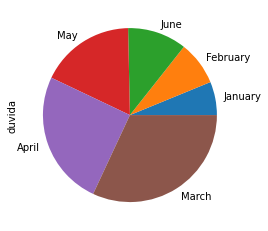

In [100]:
DoencaDB = find_in_question_or_hashtag('CORONA|COVID|SARS|PANDEMIA|VIRUS|TOSSE|ESPIRRO|GRIPE|RESFRIADO|PALADAR|CHEIRO|OLFATO')
DoencaDB.groupby(DoencaDB.data.dt.month_name())['duvida'].count().sort_values().plot(kind='pie')

- Nesta parte fazemos uma amostragem temporal de quando pesquisaram mais sobre as doenças.

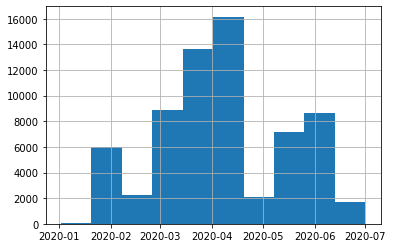

In [101]:
DoencaDB.data.hist()

### b) Medicamento

- Foi realizada uma busca por ** HIDROXICLOROQUINA, CLOROQUINA, AZITROMICINA, IVERMECTINA ** no campo dúvida ou nas hashtags. afim de saber quando foi que procuraram remédios para tratamento.

- Abaixo ilustramos a quantidade de dúvidas referentes aos principais medicamentos agregadas por mês.

Total 17730


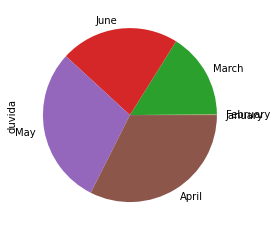

In [127]:
MedicamentoDB = find_in_question_or_hashtag('CLOROQUINA|AZITROMICINA|IVERMECTINA')
print('Total ' + str(MedicamentoDB.data.count()))
MedicamentoDB.groupby(MedicamentoDB.data.dt.month_name())['duvida'].count().sort_values().plot(kind='pie')

- Constatamos que o medicamento `Cloroquina` foi responsável por mais de 90% das dúvidas originadas pelos brasileiros no Twitter.
- Por meio de seu histograma, é possível identificar o momento de pico em abril e outro menor em maio e junho.

Total para Cloroquina 93.5815002820079


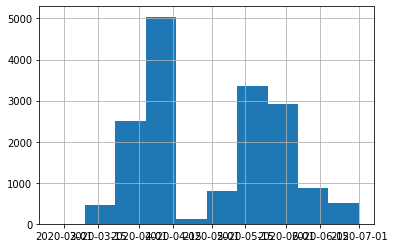

In [129]:
CloroquinaDB = find_in_question_or_hashtag('CLOROQUINA')
print('Total para Cloroquina ' + str(CloroquinaDB.data.count()/MedicamentoDB.data.count()*100))
CloroquinaDB.data.hist()

### c) Organizações

- Nesta parte separamos as dúvidas e contamos a quantidade de vezes que as organizações da saúde foram mensionadas.
O Ministério da Saúde foi mensionado 195 vezes, o SUS 304 vezes e a OMS 787 vezes.

In [104]:
MinisterioDB = find_in_question_or_hashtag('MINISTERIO.*SAUDE')
MinisterioDB.duvida.count()

195

In [105]:
SusDB = find_in_question_or_hashtag('[ |-]SUS[ |,|.|;|!|?]')
SusDB.duvida.count()

304

In [106]:
OmsDB = find_in_question_or_hashtag('[ |-]OMS[ |,|.|;|!|?]')
OmsDB.duvida.count()

787

### d) Pessoas

Devido ao baixo volume de citações à governadores e prefeitos, optamos por analisar apenas figuras nacionais, tais como o presidente Bolsonaro, o ex-ministro da saúde Mandetta e o então ministro da saúde Pazzuello. 

- O gráfico em pizza abaixo ilustra a quantidade de dúvidas relacionadas ao presidente **Bolsonaro**, agregadas por mês. Pode-se constatar que o maior volume de dúvidas ocorreu nos meses de março a abril e de maio a junho.

- Entre março e abril foi quando o Brasil vivenciou o pico da pandemia do Coronavírus.

- Já entre maio e junho, houve muita polêmica a respeito dos medicamentos para combate ao coronavírus e a doação de 2 milhões de doses de Hidroxicloroquina dos Estados Unidos para o Brasil.

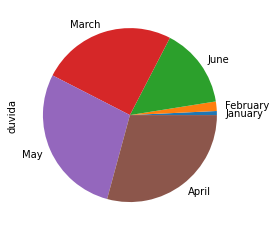

In [107]:
BolsonaroDB = find_in_question_or_hashtag('BOLSONARO|BOZO|BOLSOMIN|BOSO|PRESIDENTE')
BolsonaroDB.groupby(BolsonaroDB.data.dt.month_name())['duvida'].count().sort_values().plot(kind='pie')

- Realizamos uma amostragem temporal de quando pesquisaram mais sobre as nosso presidente. onde mostra um crescimento no período de março e abril, cai um pouco em maio e volta a subir em Junho.

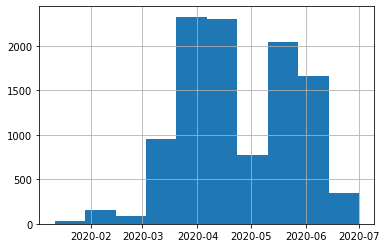

In [108]:
BolsonaroDB.data.hist()

- A amostragem abaixo mostra atravez do grafico pizza a porcentagem das vezes que as palavras **MANDETA, MANDETTA, MINSAUDE, MINISTRO DA SAUDE** são pesquisadas. E foi verificado que o grafico pizza mostra que as palavras aumentaram no mês de abril.


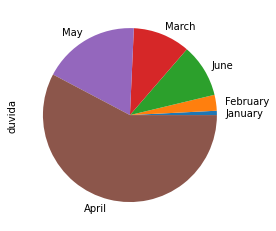

In [109]:
MandetaDB = find_in_question_or_hashtag('MANDETA|MANDETTA|MINSAUDE|MINISTRO.*SAUDE')
MandetaDB.groupby(MandetaDB.data.dt.month_name())['duvida'].count().sort_values().plot(kind='pie')

- Realizamos uma amostragem temporal de quando pesquisaram mais sobre o Mandetta. onde mostra um crescimento no período de abril e maio, baixa nos demais meses.

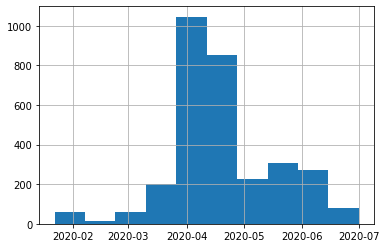

In [110]:
MandetaDB.data.hist()

- O gráfico abaixo ilustra o mês em que houveram mais dúvidas referentes ao então ministro interino **PAZZUELLO**. As dúvidas começaram em maio e cessaram em junho, possivelmente devido à sua pouca exposição na mídia.

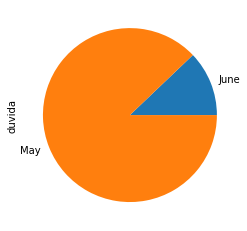

In [111]:
PazuelloDB = find_in_question_or_hashtag('PAZ+UEL+O')
PazuelloDB.groupby(PazuelloDB.data.dt.month_name())['duvida'].count().sort_values().plot(kind='pie')

## 3. Visão Temporal

- Houve aumento das perguntas gradativamente até abril, depois caiu a quantidade de perguntas, voltando a aumentar em maio.

- O pico de dúvidas dos brasileiros no Twitter em abril coincidiu com dois eventos: a saída do ministro da saúde Mandetta; e o Brasil atingindo os 100 mil casos confirmados de COVID-19.

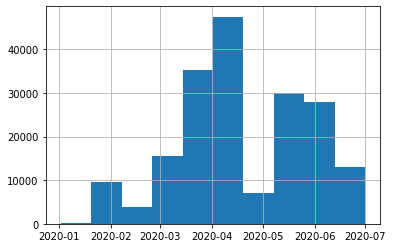

In [112]:
DuvidasDB.data.hist()

## 4. Visão Geográfica

- Fazendo uma análise espacial das dúvidas, podemos constatar uma grande concentração na região Sudeste do Brasil, muito similar ao resultado obtido quando analisamos todos os tweets na primeira etapa do trabalho.

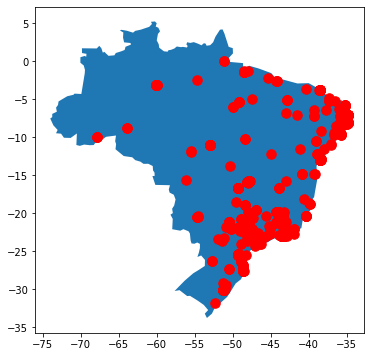

In [113]:
brazil = world[world.name == 'Brazil'].plot(figsize=(10, 6))
GeoDataFrame(DuvidasDB[DuvidasDB.sigla.eq('BR')]).plot(ax=brazil, marker='o', color='red', markersize=90)

- Para evidenciar essa concentração, agregamos os dados por cidade. Conforme pode ser constatado no gráfico abaixo, Belo Horizonte, Rio de Janeiro e São Paulo concentram aproximadamente 50% de todas as dúvidas espacializadas.

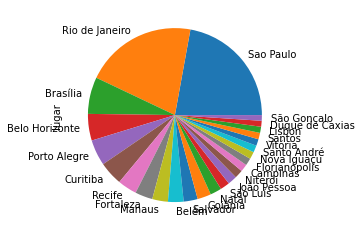

In [114]:
DuvidasDB.lugar.value_counts().nlargest(25).plot(kind="pie")